# Assignment 1
In this assignment, I've prepared the data analysis based on next fields:
- 'fico_range_low' - the lower boundary range the borrower’s FICO at loan origination belongs to
- 'fico_range_high' - the upper boundary range the borrower’s FICO at loan origination belongs to
- 'emp_length' - employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years

FICO values were selected as the key indicators for borrower's classification.
The employment length field was selected as the general field that can be used for additional borrower's analytics to discover if there are any correlations or insights based on different employment periods.

The assignment is split into key parts that contain:
- loading data
- cleaning data
- displaying summary statistics
- categorizing data based on used fields
- visualizing data
- discovering the insights

## 1. Import libraries, load data
All imports are gathered in one place to make sure that they're not duplicated and can be reviewed complexly.
The final output from the 3rd lesson is selected as the data source for the current assignment.

In [79]:
python_material_folder_name = "python-material"

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

path_python_material = ".."

# Data loading
df = pd.read_csv(f"{path_python_material}/data/2-intermediate/df_out_dsif3.csv")
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,hardship_status_filled,last_pymnt_amnt_log,last_pymnt_amnt_capped,loan_id_extracted,emp_title_clean,emp_title_manager,Job Title,Category,int_rate_clean,term_numeric,debt_to_income,interest_per_loan_amnt,loan_amnt_log,grade_encoded,loan_amnt_std,annual_inc_std,loan_amnt_norm,annual_inc_norm
0,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NO_HARDSHIP,4.912140,134.93,167338079,cashier,False,NaN,NaN,0.1308,36,0.083333,1569.6,8.294300,1,-1.196895,-0.367206,0.083969,0.004364
1,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0

## 2. Clean data
In this section, the selected fields are checked on unique and nullable values.
Also, an additional field 'fico_average' is created to make it possible to categorize data based on distinct value further.

### 2.1. Data cleaning for 'emp_length' field
Values are standardized to the same format.
A separate dataset with not nullable values is created for further analysis.

In [80]:
distinct_values = df['emp_length'].unique()
# print(distinct_values)
# Defined that the dataset has nullable values so should be cleaned up for further analysis

# Standardizing the 'emp_length' column (to have the same format for all values)
df['emp_length_clean'] = df['emp_length'].replace({
    '10+ years': '10',
    '< 1 year': '0'
}).str.rstrip(' years').astype('float')

distinct_cleaned_values = df['emp_length_clean'].unique()
# print(distinct_cleaned_values)

# Filtering rows where 'emp_length_clean' is not NaN
df_filled_emp_length = df[df['emp_length_clean'].notna()]
# print(df_filled_emp_length.head(10))

### 2.2. Data cleaning for 'fico_range_low', 'fico_range_high' fields
Values are checked to the nullable values.
New column with main 'fico' value is prepared.

In [81]:
distinct_fico_range_high_values = df['fico_range_low'].unique()
print('fico_range_low', distinct_fico_range_high_values)

distinct_fico_range_high_values = df['fico_range_high'].unique()
print('fico_range_high', distinct_fico_range_high_values)

fico_range_low [665. 680. 750. 735. 700. 790. 760. 690. 670. 725. 705. 675. 800. 710.
 695. 660. 720. 795. 730. 715. 755. 685. 780. 740. 785. 765. 745. 775.
 805. 810. 825. 815. 770. 820. 830. 845. 655. 840. 835. 645. 640. 650.]
fico_range_high [669. 684. 754. 739. 704. 794. 764. 694. 674. 729. 709. 679. 804. 714.
 699. 664. 724. 799. 734. 719. 759. 689. 784. 744. 789. 769. 749. 779.
 809. 814. 829. 819. 774. 824. 834. 850. 659. 844. 839. 649. 644. 654.]


In [86]:
df['fico_average'] = (df['fico_range_low'] + df['fico_range_high']) / 2

## 3. Summary statistics
In this section, the statistics are analyzed for selected fields to be able to ensure that the data is understandable and ranges for further analytics are clarified correctly.

### 3.1. Defining the main function for summary statistics analysis
Defined the general function for printing the overall statistics of the selected field.

In [82]:
def summary_statistics(df:pd.DataFrame, column:str):
    mean_loan = ("%.2f" % df[column].mean())
    median_loan = df[column].median()
    mode_loan = df[column].mode()[0]
    std_loan = df[column].std()
    percentiles_loan = df[column].quantile([0.25, 0.5, 0.75])
    
    print(f"Mean: {mean_loan}")
    print(f"Median: {median_loan}")
    print(f"Mode: {mode_loan}")
    print(f"Standard Deviation: {std_loan}")
    print(f"Percentiles: \n{percentiles_loan}")

### 3.2. Printing summary statistics for 'fico_range_low' field

In [83]:
summary_statistics(df, 'fico_range_low')

Mean: 700.64
Median: 695.0
Mode: 670.0
Standard Deviation: 33.800996263919274
Percentiles: 
0.25    675.0
0.50    695.0
0.75    720.0
Name: fico_range_low, dtype: float64


### 3.3. Printing summary statistics for 'fico_range_high' field

In [84]:
summary_statistics(df, 'fico_range_high')

Mean: 704.64
Median: 699.0
Mode: 674.0
Standard Deviation: 33.802024824782656
Percentiles: 
0.25    679.0
0.50    699.0
0.75    724.0
Name: fico_range_high, dtype: float64


### 3.4. Printing summary statistics for 'fico_average' field

In [87]:
summary_statistics(df, 'fico_average')

Mean: 702.64
Median: 697.0
Mode: 672.0
Standard Deviation: 33.8015096609331
Percentiles: 
0.25    677.0
0.50    697.0
0.75    722.0
Name: fico_average, dtype: float64


The defined values for categorizing FICO ranges: 
1. Excellent Credit: 800 and above
2. Very Good Credit: 740 - 799
3. Good Credit: 670 - 739
4. Fair Credit: 580 - 669
5. Poor Credit: Below 580

In general, the statistics show that the majority of borrowers have "good" credit scores, with some skew toward the lower end of the range. There is also a notable distribution of borrowers with stronger credit scores, as reflected by the 75th percentile at 722.

## 4. Feature engineering
In this section, the categories are created based on the prepared 'emp_length_clean' and 'fico_average' fields.
Categories are labeled into numeric values and correlation charts are prepared to have the ability to find the values that can be strongly related in change with the defined categories.

### 4.1. Categorizing data based on employment length

In [89]:
# Defining bins and labels for categorizing the employment length
bins = [0, 1, 5, 10, np.inf]
labels = ['< 1 year', '1-5 years', '6-10 years', '10+ years']

# Using pd.cut to categorize the employment length
df_filled_emp_length.loc[:, 'emp_length_category'] = pd.cut(df_filled_emp_length['emp_length_clean'], bins=bins, labels=labels, right=False)

# Checking up the results
print(df_filled_emp_length[['emp_length', 'emp_length_clean', 'emp_length_category']].head(10))

   emp_length  emp_length_clean emp_length_category
0   10+ years              10.0           10+ years
1     6 years               6.0          6-10 years
2   10+ years              10.0           10+ years
4   10+ years              10.0           10+ years
5   10+ years              10.0           10+ years
6     6 years               6.0          6-10 years
7     2 years               2.0           1-5 years
9     4 years               4.0           1-5 years
10    6 years               6.0          6-10 years
11    7 years               7.0          6-10 years


In [91]:
# Label encoding
le = LabelEncoder()
df_filled_emp_length.loc[:, 'emp_length_category_encoded'] = le.fit_transform(df_filled_emp_length['emp_length_category'])
df_filled_emp_length[['emp_length_category', 'emp_length_category_encoded']].head()

,emp_length_category,emp_length_category_encoded
0,10+ years,1
1,6-10 years,2
2,10+ years,1
4,10+ years,1
5,10+ years,1


In [92]:
# Group by the encoded employment length and calculate mean/median loan amount or annual income
grouped_stats = df_filled_emp_length.groupby('emp_length_category_encoded')['annual_inc'].mean()
print(grouped_stats)

emp_length_category_encoded
0    76864.564207
1    88366.813713
2    81474.623221
3    78220.533804
Name: annual_inc, dtype: float64


Based on the prepared grouping it was defined that there is no huge difference in the mean values of different groups, so in general, we can clarify the most of the annual income values are the same for different employment groups.

sec_app_num_rev_accts             0.043041
hardship_payoff_balance_amount    0.038683
sec_app_open_acc                  0.034314
emp_length_clean                  0.033029
il_util                           0.027943
Name: emp_length_category_encoded, dtype: float64


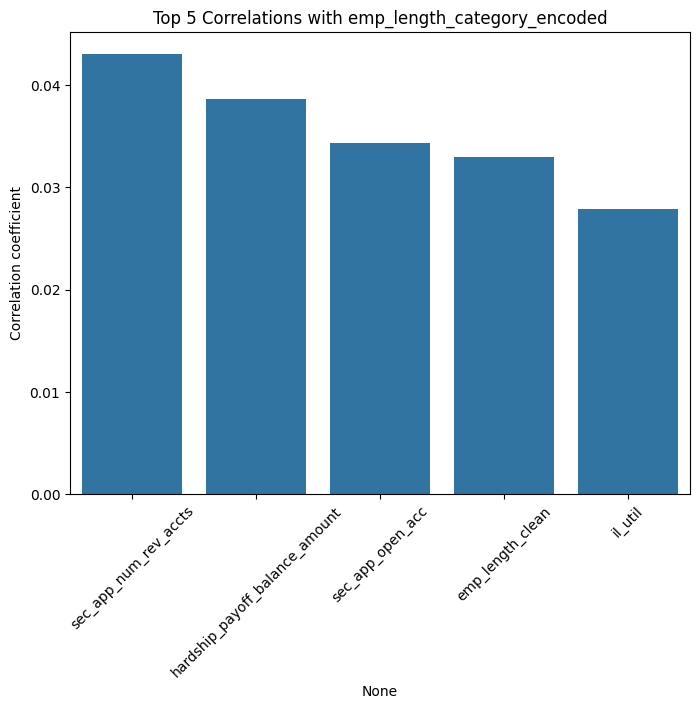

In [93]:
# Select numeric columns, including the encoded employment length category
numeric_columns = df_filled_emp_length.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
emp_length_corr = correlation_matrix['emp_length_category_encoded'].drop('emp_length_category_encoded')
emp_length_corr_sorted = emp_length_corr.abs().sort_values(ascending=False)

# Display the top 5 correlations
top_n = 5 
print(emp_length_corr_sorted.head(top_n))

plt.figure(figsize=(8, 6))
sns.barplot(x=emp_length_corr_sorted.head(top_n).index, y=emp_length_corr_sorted.head(top_n).values)
plt.title(f'Top {top_n} Correlations with emp_length_category_encoded')
plt.ylabel('Correlation coefficient')
plt.xticks(rotation=45)
plt.show()

Based on the prepared correlation chart it was defined that there are no numeric values that are highly correlated with the employment length category. So this value can be omitted in further analytics and not be considered as critical customer identifier.

### 4.2. Categorizing data based on FICO average field

In [94]:
def categorize_fico(fico_avg):
    if fico_avg >= 800:
        return 'Excellent Credit'
    elif fico_avg >= 740:
        return 'Very Good Credit'
    elif fico_avg >= 670:
        return 'Good Credit'
    elif fico_avg >= 580:
        return 'Fair Credit'
    else:
        return 'Poor Credit'

df['fico_category'] = df['fico_average'].apply(categorize_fico)

# Checking up the results
print(df[['fico_range_low', 'fico_range_high', 'fico_average', 'fico_category']].head(5))

   fico_range_low  fico_range_high  fico_average     fico_category
0           665.0            669.0         667.0       Fair Credit
1           680.0            684.0         682.0       Good Credit
2           665.0            669.0         667.0       Fair Credit
3           750.0            754.0         752.0  Very Good Credit
4           735.0            739.0         737.0       Good Credit


In [95]:
# Encoding data based on created category values
df.loc[:, 'fico_category_encoded'] = le.fit_transform(df['fico_category'])
df[['fico_category_encoded', 'fico_category']].head(10)

,fico_category_encoded,fico_category
0,1,Fair Credit
1,2,Good Credit
2,1,Fair Credit
3,3,Very Good Credit
4,2,Good Credit
5,2,Good Credit
6,2,Good Credit
7,1,Fair Credit
8,3,Very Good Credit
9,3,Very Good Credit


fico_range_low            0.503056
fico_average              0.503036
fico_range_high           0.503017
bc_util                   0.254657
grade_encoded             0.242429
percent_bc_gt_75          0.239439
int_rate_clean            0.226841
bc_open_to_buy            0.225707
mths_since_last_record    0.223526
last_fico_range_high      0.199792
Name: fico_category_encoded, dtype: float64


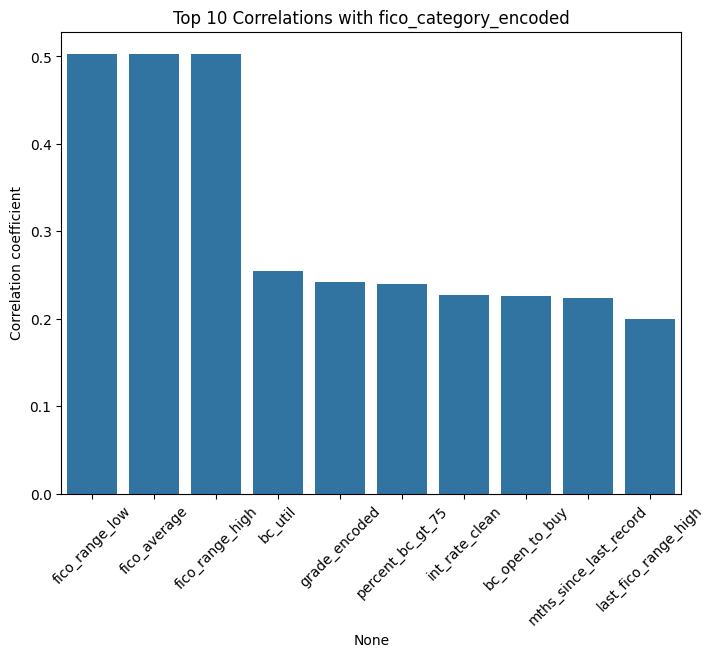

In [96]:
# Select numeric columns, including the encoded employment length category
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
fico_category_corr = correlation_matrix['fico_category_encoded'].drop('fico_category_encoded')
fico_category_corr_sorted = fico_category_corr.abs().sort_values(ascending=False)

# Display the top 5 correlations
top_n = 10
print(fico_category_corr_sorted.head(top_n))

plt.figure(figsize=(8, 6))
sns.barplot(x=fico_category_corr_sorted.head(top_n).index, y=fico_category_corr_sorted.head(top_n).values)
plt.title(f'Top {top_n} Correlations with fico_category_encoded')
plt.ylabel('Correlation coefficient')
plt.xticks(rotation=45)
plt.show()

Based on the prepared correlation chart it is clear that fico values are correlated with an average value, as the target value was built based on them.
The loan grade ('grade_encoded') value has a medium correlation which means it can be also used for fully paid probability analysis.

## 5. Visualization 
In this section, the charts are built based on created categories to check the possibility of:
- having consolidated distribution of annual income based on employment length category
- identifying the status of borrower's based on created FICO category

### 5.1. Annual income distribution by employment length

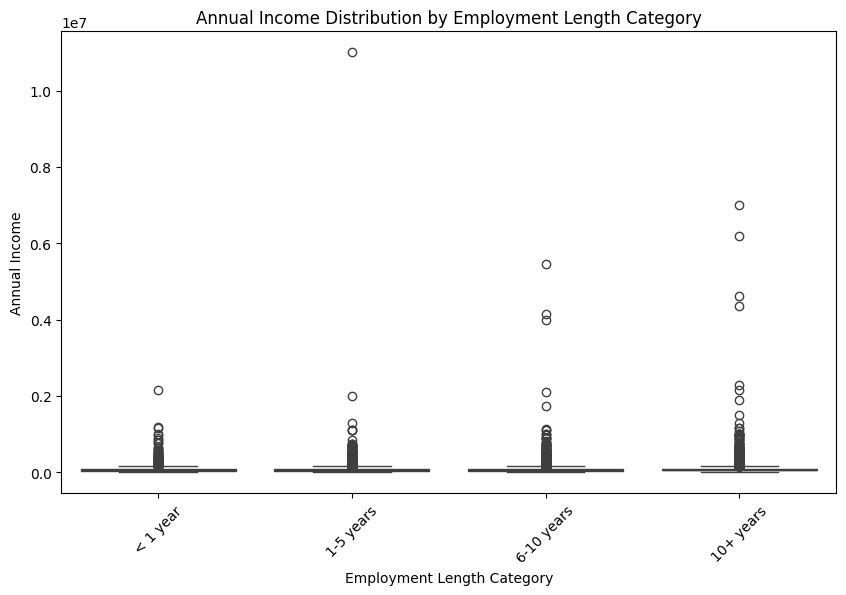

In [98]:
# Convert 'emp_length_category' to numeric codes
df_filled_emp_length.loc[:, 'emp_length_category_codes'] = df_filled_emp_length['emp_length_category'].cat.codes

# Create a box plot to visualize the distribution of 'annual_inc' for each employment length category
plt.figure(figsize=(10, 6))
sns.boxplot(x='emp_length_category', y='annual_inc', data=df_filled_emp_length)
plt.title('Annual Income Distribution by Employment Length Category')
plt.xlabel('Employment Length Category')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.show()



Based on the prepared charts it's visible that the distribution is mostly the same within different employment categories.
Expectedly the maximum value of annual income growth with the higher employment length.

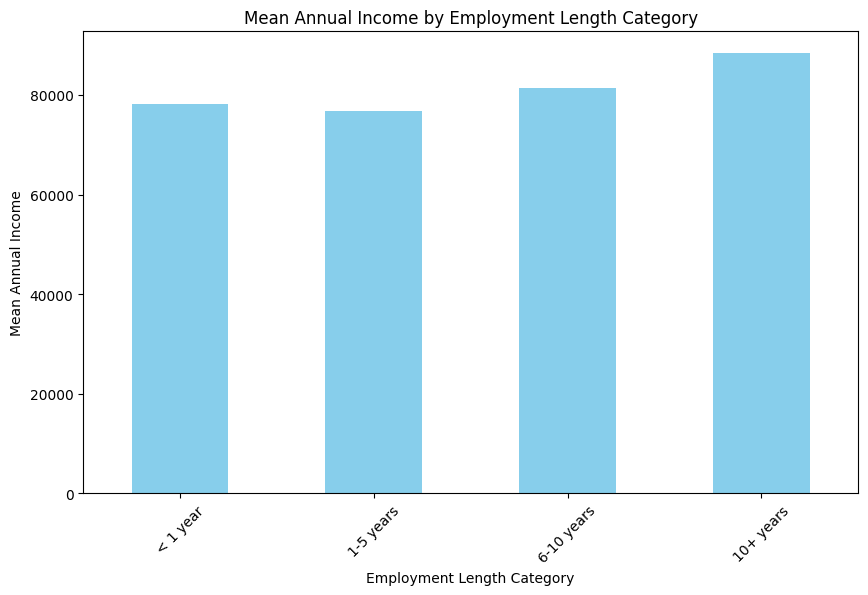

In [99]:
# Preparing the mean value to analyze the consolidated annual income based on employment length
category_mean = df_filled_emp_length.groupby('emp_length_category', observed=True)['annual_inc'].mean()

# Create a bar plot to visualize the mean 'annual_inc' for each employment length category
plt.figure(figsize=(10, 6))
category_mean.plot(kind='bar', color='skyblue')
plt.title('Mean Annual Income by Employment Length Category')
plt.xlabel('Employment Length Category')
plt.ylabel('Mean Annual Income')
plt.xticks(rotation=45)
plt.show()

Based on the prepared chart it's visible that the mean value is also the highest one for the highest employment length category.

### 5.2. Loan status distribution by FICO category

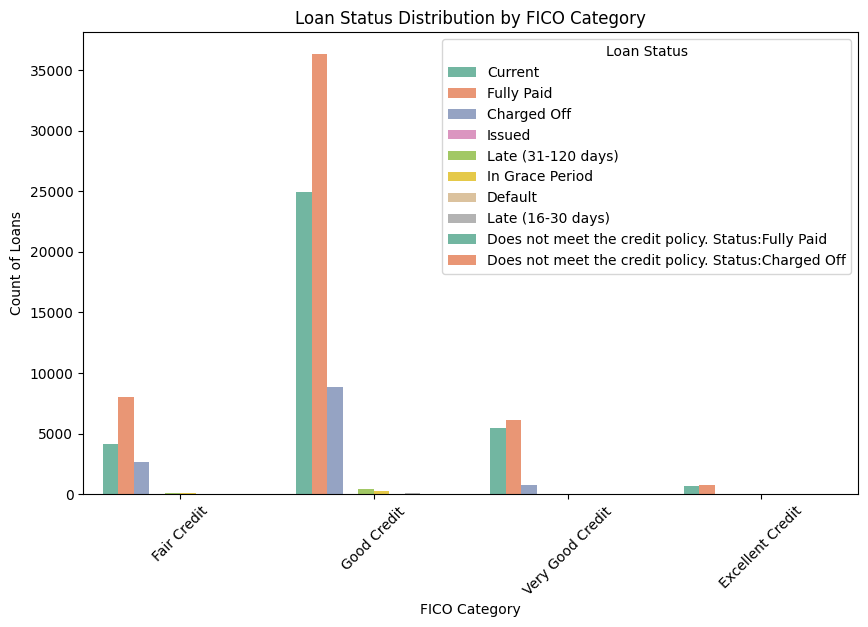

In [100]:
# Create a count plot to show loan status based on FICO category
plt.figure(figsize=(10, 6))
sns.countplot(x='fico_category', hue='loan_status', data=df, palette='Set2')
plt.title('Loan Status Distribution by FICO Category')
plt.xlabel('FICO Category')
plt.ylabel('Count of Loans')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

Based on the prepared chart it's defined that most orders are grouped in the `Good Credit` category. The stack distribution can show more precisely the % of parts that prepared groups contain.

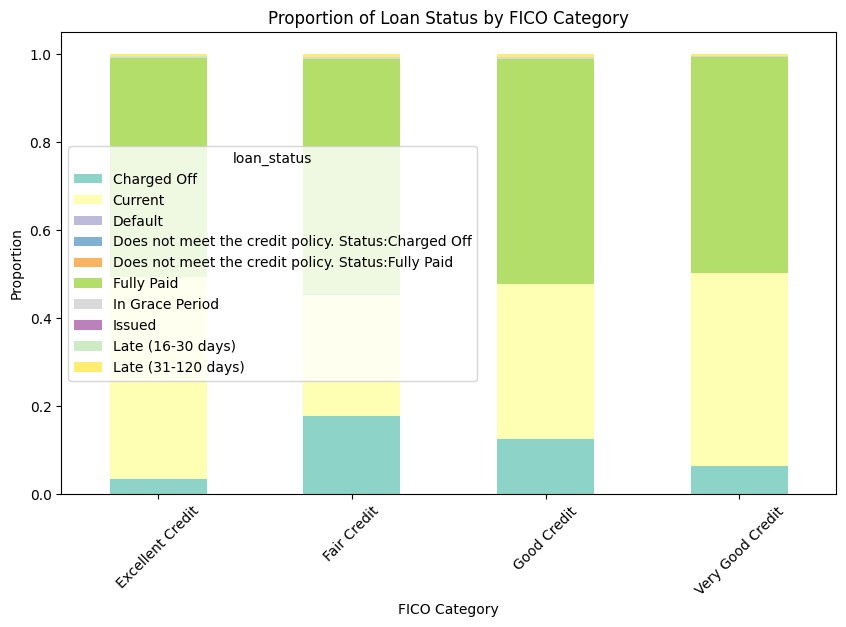

In [101]:
# Calculate the proportion of loan status based on fico category
loan_status_by_fico = df.groupby(['fico_category', 'loan_status']).size().unstack()
loan_status_by_fico_normalized = loan_status_by_fico.div(loan_status_by_fico.sum(axis=1), axis=0)

# Create a stacked bar chart
loan_status_by_fico_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')


plt.title('Proportion of Loan Status by FICO Category')
plt.xlabel('FICO Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

Based on the prepared chart it's visible that the most of `Charged Off` loans are located in the `Fair Credit` category.
It's also important to check the frequency of selected values inside the categories that can be prepared with the heatmap.

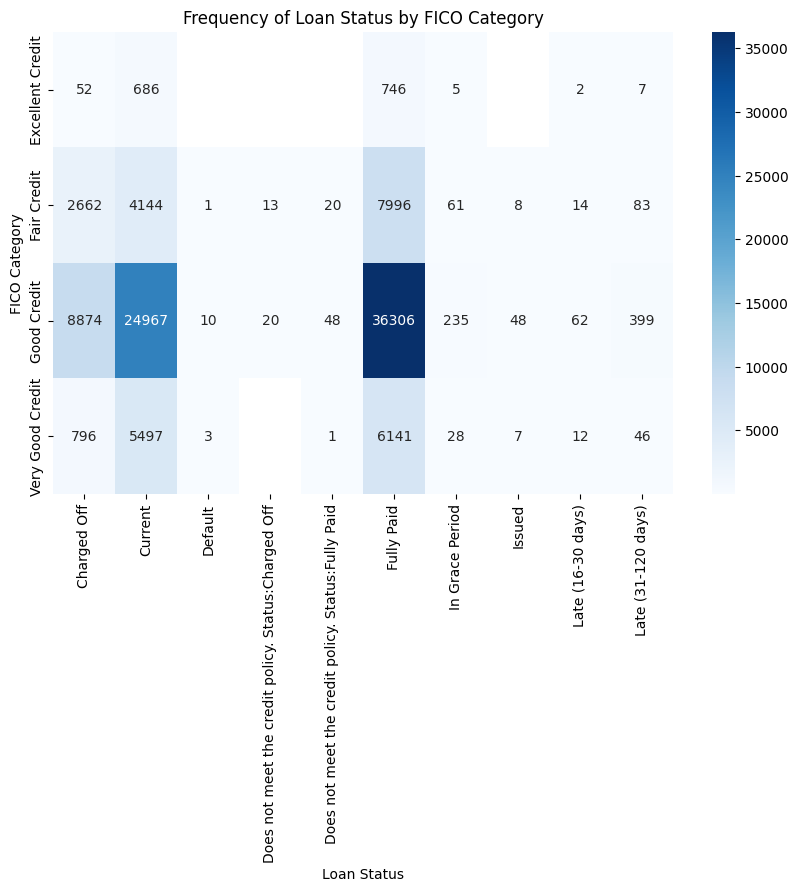

In [102]:
heatmap_data = df.groupby(['fico_category', 'loan_status']).size().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='g')
plt.title('Frequency of Loan Status by FICO Category')
plt.xlabel('Loan Status')
plt.ylabel('FICO Category')
plt.show()

## 6. Insights and conclusions
Based on prepared analytics were identified several insights that can be useful for further analysis:
1. Employment length field analytics identified that there is no strong correlation between employment length and ability to pay off the loan. In the prepared correlation chart (related to the employment length category), it was defined that there are no numeric values that are highly correlated with this value.
2. Employment length field might be useful for segmentation but not as a standalone predictive factor.
3. The FICO scores analysis shows that most charged-off loans are concentrated in the `Fair Credit` category (a FICO score between 580 and 669). This suggests that borrowers with lower FICO scores are more prone to defaulting on their loans.
4. FICO score is a critical factor in loan performance, and borrowers in the `Fair Category` may pose a higher risk of default. Risk assessment strategies should prioritize tighter credit risk checks or higher interest rates for this group.
5. Based on the prepared heatmap it's visible that the majority of borrowers are within the `Good Credit` range, which indicates potential for stable loan performance. Lenders might want to focus on marketing to this segment for reliable returns while balancing risk management for the lower `Fair Category`.
6. As the FICO score shows great potential for analytics, additional analysis could explore how FICO scores interact with other factors, such as annual income, to better predict default risk.